# Iskander Manat GH1034435
# M508A Big Data Analytics (SS0325)

## 🎬 Massive Rotten Tomatoes Movies & Reviews

Kaggle Dataset link: https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews

## Business problem:
Rotten Tomatoes receives thousands of reviews from critics. Understanding the sentiment behind these reviews could help the platform:
* help the platform to surface more relevant content to users.

* improve audience recommendation systems.



### Import Dataset and All the modules

In [1]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  iskendieur


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews


100%|████████████████████████████████████████████████████████████████████████████████| 152M/152M [00:00<00:00, 844MB/s]


In [86]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import transformers
import datasets
import evaluate
from wordcloud import WordCloud
import joblib

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
movies_df = pd.read_csv('data/rotten_tomatoes_movies.csv', encoding='latin-1')
reviews_df = pd.read_csv('data/rotten_tomatoes_movie_reviews.csv', encoding='latin-1')

print("Movies dataset shape:", movies_df.shape)
print("Reviews dataset shape:", reviews_df.shape)

Movies dataset shape: (143258, 16)
Reviews dataset shape: (1444963, 11)


In [4]:
movies_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [5]:
reviews_df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [6]:
movies_df.isnull().sum()

id                           0
title                      367
audienceScore            70010
tomatoMeter             109381
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                  4217
writer                   53142
boxOffice               128515
distributor             120257
soundMix                127341
dtype: int64

In [7]:
reviews_df.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

<Axes: title={'center': 'Sentiment Class Distribution'}, xlabel='scoreSentiment'>

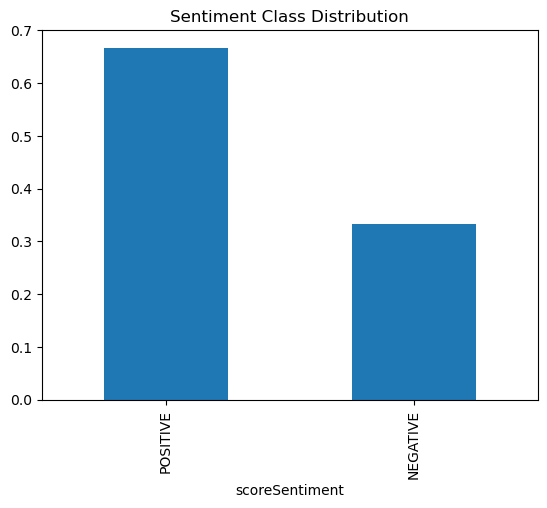

In [8]:
reviews_df['scoreSentiment'].value_counts(normalize=True).plot(kind='bar', title='Sentiment Class Distribution')

<Axes: title={'center': 'Top 10 Critics by Number of Reviews'}, ylabel='criticName'>

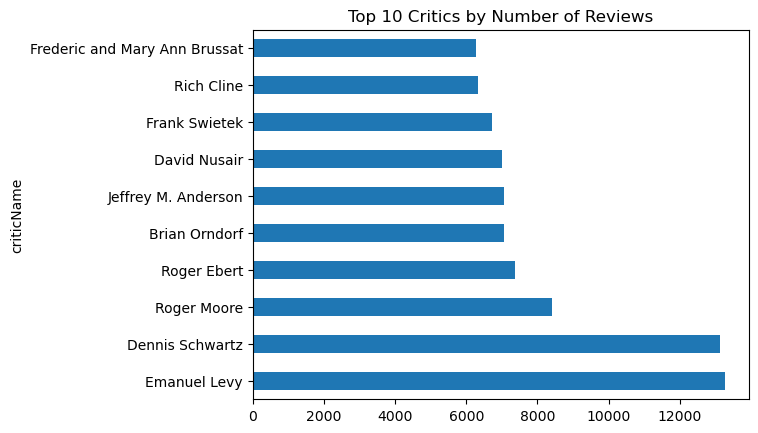

In [9]:
top_critics = reviews_df['criticName'].value_counts().head(10)
top_critics.plot(kind='barh', title='Top 10 Critics by Number of Reviews')

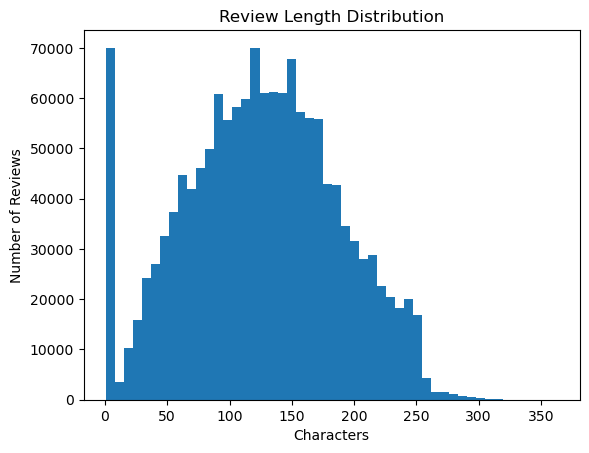

In [10]:
reviews_df['review_length'] = reviews_df['reviewText'].astype(str).apply(len)

# Stats on review lengths
reviews_df['review_length'].describe()

# Plot distribution
import matplotlib.pyplot as plt
plt.hist(reviews_df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Number of Reviews')
plt.show()


In [11]:
merged_df = reviews_df.merge(movies_df, on='id', how='left')

# Peek
merged_df[['reviewText', 'scoreSentiment', 'audienceScore', 'genre', 'boxOffice']].head()

,reviewText,scoreSentiment,audienceScore,genre,boxOffice
0,Timed to be just long enough for most youngste...,POSITIVE,75.0,Documentary,NaN
1,It doesn't matter if a movie costs 300 million...,NEGATIVE,NaN,NaN,NaN
2,The choreography is so precise and lifelike at...,POSITIVE,NaN,NaN,NaN
3,The film's out-of-touch attempts at humor may ...,NEGATIVE,NaN,NaN,NaN
4,Its clumsy determination is endearing and some...,POSITIVE,42.0,NaN,NaN


reviews_df = reviews_df.dropna(subset=['reviewText'])
reviews_df = reviews_df[reviews_df['reviewText'].str.len() >= 10]

In [13]:
reviews_df['scoreSentiment'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [14]:
reviews_df = reviews_df[reviews_df['scoreSentiment'].isin(['POSITIVE', 'NEGATIVE'])]

In [15]:
le = LabelEncoder()
reviews_df['label'] = le.fit_transform(reviews_df['scoreSentiment'])
# POSITIVE → 1, NEGATIVE → 0

### Lowercase the text

In [17]:
reviews_df['cleanText'] = reviews_df['reviewText'].str.lower()

### Remove HTML tags and URLs

In [19]:
reviews_df['cleanText'] = reviews_df['cleanText'].str.replace(r'<.*?>', '', regex=True)
reviews_df['cleanText'] = reviews_df['cleanText'].str.replace(r'http\S+|www\S+', '', regex=True)

###  Remove special characters

In [21]:
reviews_df['cleanText'] = reviews_df['cleanText'].str.replace(r'[^a-z\s]', '', regex=True)

### Tokenize text

In [23]:
reviews_df = reviews_df.dropna(subset=['cleanText'])
reviews_df['tokens'] = reviews_df['cleanText'].apply(word_tokenize)

### Lemmatize

In [25]:
reviews_df['tokens'] = reviews_df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])

### Join tokens back 

In [28]:
reviews_df['cleanText'] = reviews_df['tokens'].apply(lambda tokens: ' '.join(tokens))

### 'cleanText' column in the reviews_df now contains fully cleaned text and tokens column

In [31]:
reviews_df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,review_length,label,cleanText,tokens
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...,161,1,timed to be just long enough for most youngste...,"[timed, to, be, just, long, enough, for, most,..."
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...,164,0,it doesnt matter if a movie cost million or on...,"[it, doesnt, matter, if, a, movie, cost, milli..."
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...,246,1,the choreography is so precise and lifelike at...,"[the, choreography, is, so, precise, and, life..."
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...,127,0,the film outoftouch attempt at humor may find ...,"[the, film, outoftouch, attempt, at, humor, ma..."
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...,71,1,it clumsy determination is endearing and somet...,"[it, clumsy, determination, is, endearing, and..."


In [33]:
X = reviews_df['cleanText']
y = reviews_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [78]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2)) 

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [79]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)  
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [80]:
y_pred = model.predict(X_test_tfidf)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['NEGATIVE', 'POSITIVE']))

Accuracy: 0.8061843080814689

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.67      0.80      0.73     90646
    POSITIVE       0.89      0.81      0.85    184502

    accuracy                           0.81    275148
   macro avg       0.78      0.81      0.79    275148
weighted avg       0.82      0.81      0.81    275148



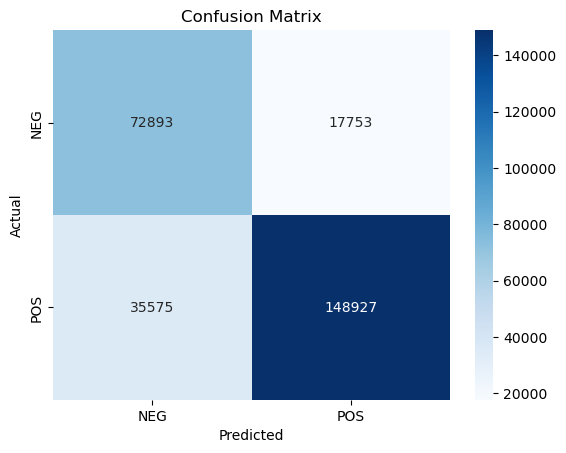

In [81]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NEG', 'POS'], yticklabels=['NEG', 'POS'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### SVM + TF-IDF

In [40]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1, 2))),
    ('svm', LinearSVC(class_weight='balanced', C=1.0, dual=False)) 
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"]))

Accuracy: 0.8223574221873319
              precision    recall  f1-score   support

    NEGATIVE       0.70      0.82      0.75     90646
    POSITIVE       0.90      0.82      0.86    184502

    accuracy                           0.82    275148
   macro avg       0.80      0.82      0.81    275148
weighted avg       0.83      0.82      0.83    275148



### Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=15000)),
    ('nb', MultinomialNB())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7886192158402023


In [53]:
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

# Top 20 neg and pos words
top_pos = sorted(zip(coefs, feature_names), reverse=True)[:20]
top_neg = sorted(zip(coefs, feature_names))[:20]

print("Positive words:")
for coef, word in top_pos:
    print(f"{word}: {round(coef, 4)}")

print("Negative words:")
for coef, word in top_neg:
    print(f"{word}: {round(coef, 4)}")

Positive words:
refreshing: 6.9425
delightful: 6.93
riveting: 6.6216
gem: 6.5368
not only: 6.4394
brilliantly: 6.3536
superb: 6.3239
entertaining: 6.2531
refreshingly: 6.1622
wonderfully: 6.0728
not bad: 5.9431
fun: 5.8399
enjoyable: 5.6931
deftly: 5.6556
engrossing: 5.6304
gripping: 5.4177
heartbreaking: 5.395
masterpiece: 5.374
delightfully: 5.349
powerful: 5.3323
Negative words:
unfunny: -9.4751
unfortunately: -9.2137
tedious: -8.599
poorly: -8.4058
bland: -7.8975
misfire: -7.8796
lack: -7.833
disappointing: -7.7291
fails: -7.5325
lifeless: -7.5092
uninspired: -7.3824
lame: -6.8827
tiresome: -6.8572
inert: -6.7654
disappointment: -6.7633
unconvincing: -6.7496
inept: -6.682
not very: -6.6602
pointless: -6.6515
not enough: -6.5702


In [65]:
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

top_pos = sorted(zip(coefs, feature_names), reverse=True)[:20]
top_neg = sorted(zip(coefs, feature_names))[:20]

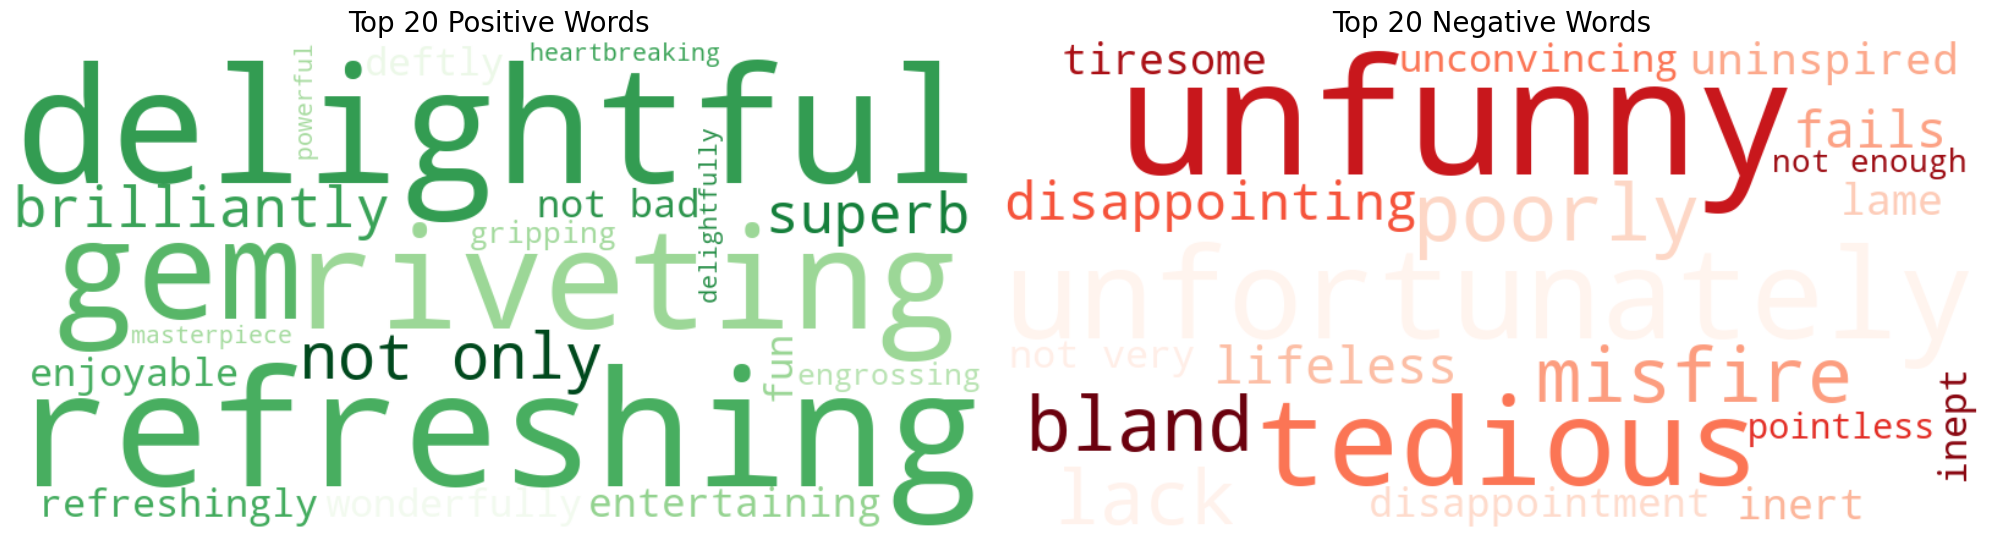

In [67]:
top_pos_dict = {word: coef for coef, word in top_pos}
top_neg_dict = {word: abs(coef) for coef, word in top_neg}  # абсолют для отображения

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens')
wordcloud_pos.generate_from_frequencies(top_pos_dict)
axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].set_title("Top 20 Positive Words", fontsize=20)
axs[0].axis('off')

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds')
wordcloud_neg.generate_from_frequencies(top_neg_dict)
axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].set_title("Top 20 Negative Words", fontsize=20)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [88]:
joblib.dump(model, "logreg_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [90]:
def predict_sentiment(text):
    vec = tfidf.transform([text])
    pred = model.predict(vec)[0]
    return "POSITIVE" if pred == 1 else "NEGATIVE"

print(predict_sentiment("this movie was a masterpiece, truly enjoyable"))
print(predict_sentiment("lifeless, uninspired and pointless"))

POSITIVE
NEGATIVE
